## Task Overview

**Data**: Each entry is a fixed-size sequence of values, generated from 4 different classes
 
 **Objective**: Predict the class of a given sequence

In [1]:
import pandas as pd
import numpy as np
import shutil
from datetime import datetime
import multiprocessing

import tensorflow as tf
from tensorflow import data

import matplotlib.pyplot as plt

print(tf.__version__)

/Users/khalidsalama/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


1.4.0


In [2]:
MODEL_NAME = 'seq-model-03'

SEQUENCE_LENGTH = 10

TRAIN_DATA_SIZE = 1200 # sequences (entries)
TEST_DATA_SIZE = 300

TRAIN_DATA_FILE = 'data/seq03.train.csv'
TEST_DATA_FILE = 'data/seq03.test.csv'

RESUME_TRAINING = False
MULTI_THREADING = True

SKIP_DATA_GENERATION = False

## Generate Sequence Data

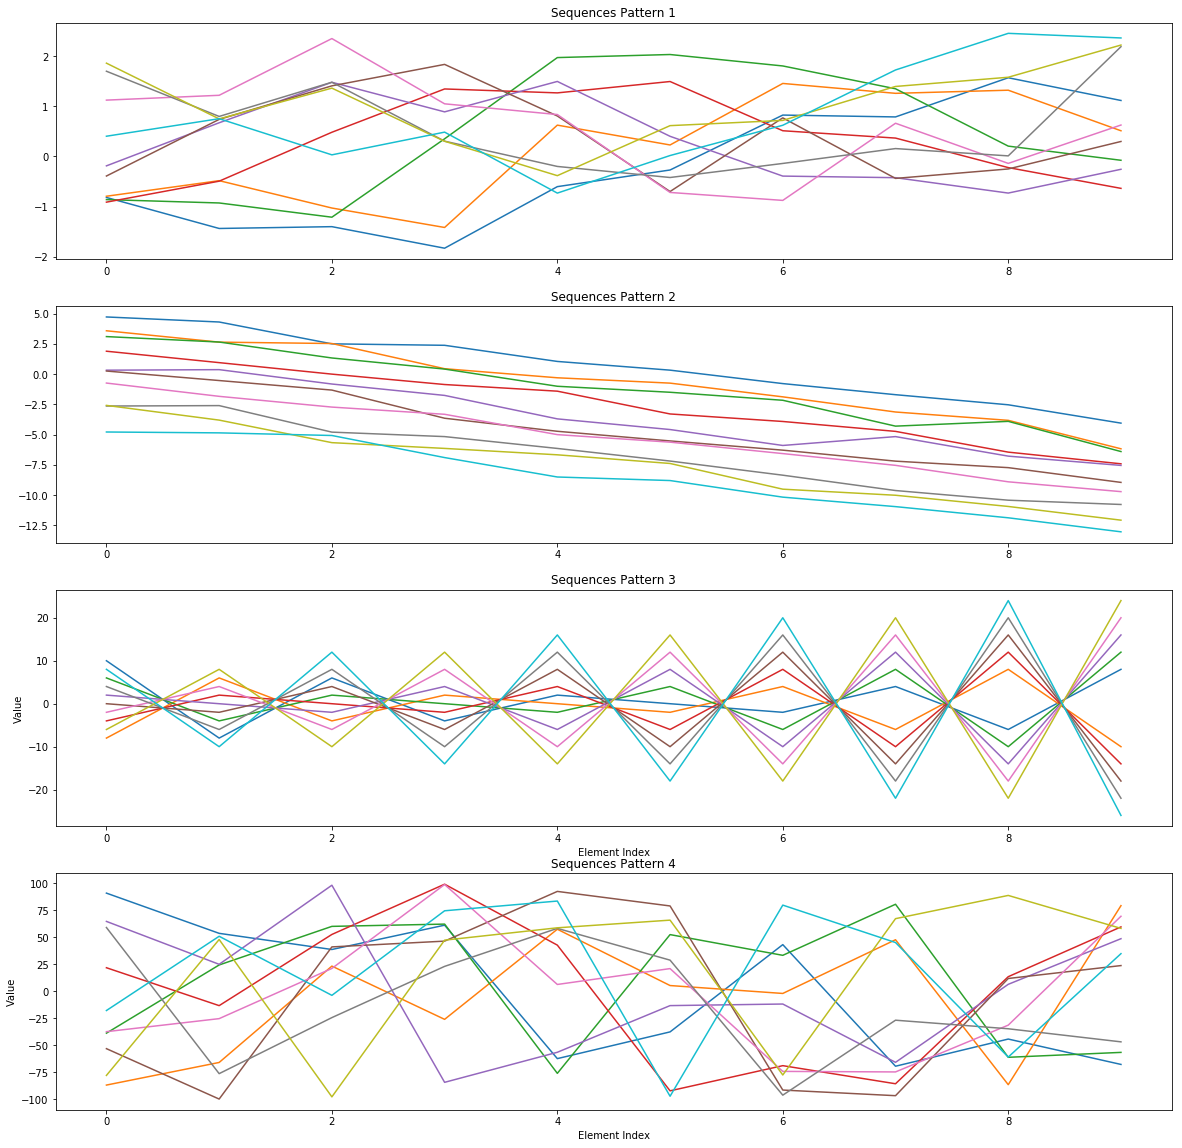

In [3]:
NOISE_RANGE = .5
TREND = 10.
OSCILIATION = 5.
np.random.seed = 19831006

def create_sequence1(start_value):

    x =  np.array(range(start_value, start_value+SEQUENCE_LENGTH))
    noise = np.random.normal(0, NOISE_RANGE, SEQUENCE_LENGTH)
    y = np.sin(np.pi * x / OSCILIATION) + (x / TREND + noise)
    return y


def create_sequence2(start_value):

    x =  np.array(range(start_value, start_value+SEQUENCE_LENGTH))
    noise = np.random.normal(0, NOISE_RANGE, SEQUENCE_LENGTH)
    y = -x + noise
    return y


def create_sequence3(start_value):

    x =  np.array(range(start_value, start_value+SEQUENCE_LENGTH))
    y = []
    
    for x_i in x:
        y_i = 0
        if x_i % 2 == 0:
            y_i = x_i * 2
        else:
            y_i =  - x_i * 2
        y += [y_i]
     
    return y


def create_sequence4():
    return np.random.uniform(-100,100,SEQUENCE_LENGTH)

plt.close('all')
plt.figure(figsize=(20, 20))

plt.subplot(4,1,1)
plt.title("Sequences Pattern 1")

for i in range(-5, 5):
    
    x = range(SEQUENCE_LENGTH)
    y = create_sequence1(i)
    plt.plot(x,y)
    
    
plt.subplot(4,1,2)
plt.title("Sequences Pattern 2")

for i in range(-5, 5):
    
    x = range(SEQUENCE_LENGTH)
    y = create_sequence2(i)
    plt.plot(x,y)
    

plt.subplot(4,1,3)
plt.title("Sequences Pattern 3")

for i in range(-5, 5):
    
    x = range(SEQUENCE_LENGTH)
    y = create_sequence3(i)
    plt.plot(x,y)


plt.xlabel("Element Index")
plt.ylabel("Value")

plt.subplot(4,1,4)
plt.title("Sequences Pattern 4")

for i in range(-5, 5):
    
    x = range(SEQUENCE_LENGTH)
    y = create_sequence4()
    plt.plot(x,y)


plt.xlabel("Element Index")
plt.ylabel("Value")
plt.show()

In [4]:
patterns = 3
start = int(-1*TRAIN_DATA_SIZE/(2*patterns))
end = int(TRAIN_DATA_SIZE/(2*patterns))

def to_csv():
    
    with open(TRAIN_DATA_FILE, 'w') as train_file_writer:
        with open(TEST_DATA_FILE, 'w') as test_file_writer:
            
            for line_index in range(start, end):
                
                sequence1 = create_sequence1(line_index)
                csv_line1 = ",".join(map(str, sequence1))
                csv_line1 = csv_line1 +",P01"
                
                sequence2 = create_sequence2(line_index)
                csv_line2 = ",".join(map(str, sequence2))
                csv_line2 = csv_line2 +",P02"
                
                sequence3 = create_sequence3(line_index)
                csv_line3 = ",".join(map(str, sequence3))
                csv_line3 = csv_line3 +",P03"
                
                sequence4 = create_sequence4()
                csv_line4 = ",".join(map(str, sequence4))
                csv_line4 = csv_line4 +",P04"
                
                if line_index  % 6 == 0:
                    test_file_writer.write(csv_line1 + '\n')
                    test_file_writer.write(csv_line2 + '\n')
                    test_file_writer.write(csv_line3 + '\n')
                    test_file_writer.write(csv_line4 + '\n')
                else:
                    train_file_writer.write(csv_line1 + '\n')
                    train_file_writer.write(csv_line2 + '\n')
                    train_file_writer.write(csv_line3 + '\n')
                    train_file_writer.write(csv_line4 + '\n')
                    
if not SKIP_DATA_GENERATION:               
    to_csv()

In [5]:
df1 = pd.read_csv(TRAIN_DATA_FILE,header=None)
df2 = pd.read_csv(TEST_DATA_FILE,header=None)
print(len(df1))
print(len(df2))
df1.head()

1332
268


,0,1,2,3,4,5,6,7,8,9,10
0,-20.361654,-19.371879,-19.426682,-18.360922,-19.164915,-19.706995,-19.419690,-20.041761,-21.063975,-20.385161,P01
1,200.665383,199.018723,197.256093,196.926688,196.427651,195.104757,193.953606,193.071130,192.041907,191.590398,P02
2,-400.000000,398.000000,-396.000000,394.000000,-392.000000,390.000000,-388.000000,386.000000,-384.000000,382.000000,P03
3,-8.753103,-3.945965,30.863796,99.269379,-4.302206,9.110622,7.607059,83.609547,-38.506094,-10.500895,P04
4,-19.855562,-19.887826,-18.669327,-18.872955,-19.499143,-20.114933,-20.464284,-19.735446,-19.951940,-19.141953,P01


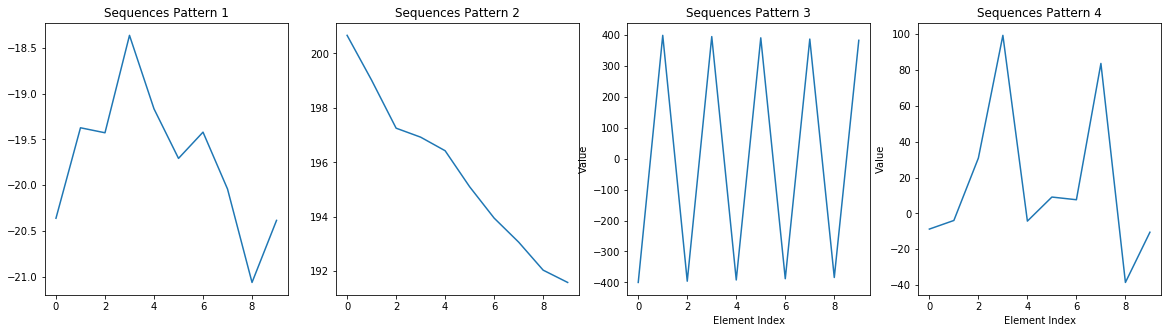

In [6]:
plt.close('all')
plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
plt.title("Sequences Pattern 1")
x = range(SEQUENCE_LENGTH)
y = df1.iloc[0,:-1]
plt.plot(x,y)

plt.subplot(1,4,2)
plt.title("Sequences Pattern 2")
x = range(SEQUENCE_LENGTH)
y = df1.iloc[1,:-1]
plt.plot(x,y)

plt.subplot(1,4,3)
plt.title("Sequences Pattern 3")
x = range(SEQUENCE_LENGTH)
y = df1.iloc[2,:-1]
plt.plot(x,y)
    
plt.xlabel("Element Index")
plt.ylabel("Value")

plt.subplot(1,4,4)
plt.title("Sequences Pattern 4")
x = range(SEQUENCE_LENGTH)
y = df1.iloc[3,:-1]
plt.plot(x,y)
    
plt.xlabel("Element Index")
plt.ylabel("Value")
plt.show()    

## 1. Define Dataset Metadata

In [7]:
DEFAULTS = [[0.0] for i in range(0, SEQUENCE_LENGTH)] + [['']]
VALUES_FEATURE_NAME = 'values'
TARGET_FEATURE_NAME = 'target'
TARGET_LABELS = ['P01', 'P02', 'P03', 'P04']

## 2. Define Data Input Function

In [8]:
def parse_csv_row(csv_row):
    
    # sequence is a list of tensors
    sequence = tf.decode_csv(tf.expand_dims(csv_row, -1), record_defaults=DEFAULTS)

    input_sequence = sequence[:SEQUENCE_LENGTH]  # input elements in the sequence
    
    output_label = sequence[len(sequence) -1] # output elements in the sequence

    input_tensor = tf.concat(input_sequence, axis=1)
   # output_tensor = tf.concat(output_sequence, axis=1)
    
    return {VALUES_FEATURE_NAME: input_tensor}, tf.squeeze(output_label)

In [9]:
def parse_label_column(label_string_tensor):
    table = tf.contrib.lookup.index_table_from_tensor(tf.constant(TARGET_LABELS))
    return table.lookup(label_string_tensor)

def csv_input_fn(files_name_pattern, mode=tf.estimator.ModeKeys.EVAL, 
                 skip_header_lines=0, 
                 num_epochs=1, 
                 batch_size=20):
    
    shuffle = True if mode == tf.estimator.ModeKeys.TRAIN else False
    
    num_threads = multiprocessing.cpu_count() if MULTI_THREADING else 1
    
    print("")
    print("* data input_fn:")
    print("================")
    print("Input file(s): {}".format(files_name_pattern))
    print("Batch size: {}".format(batch_size))
    print("Epoch Count: {}".format(num_epochs))
    print("Mode: {}".format(mode))
    print("Shuffle: {}".format(shuffle))
    print("================")
    print("")
    
    file_names = tf.matching_files(files_name_pattern)

    dataset = data.TextLineDataset(filenames=file_names)
    dataset = dataset.skip(skip_header_lines)
    
    if shuffle:
        dataset = dataset.shuffle(buffer_size=2 * batch_size + 1)

    dataset = dataset.batch(batch_size)
    dataset = dataset.map(lambda csv_row: parse_csv_row(csv_row), 
                          num_parallel_calls=num_threads)
    
    dataset = dataset.repeat(num_epochs)
    iterator = dataset.make_one_shot_iterator()
    
    features, target = iterator.get_next()
    return features, parse_label_column(target)

In [10]:
features, target = csv_input_fn(files_name_pattern="")
print("Features in CSV: {}".format(features))
print("Target in CSV: {}".format(target))


* data input_fn:
Input file(s): 
Batch size: 20
Epoch Count: 1
Mode: eval
Shuffle: False

Features in CSV: {'values': <tf.Tensor 'IteratorGetNext:0' shape=(?, 10) dtype=float32>}
Target in CSV: Tensor("hash_table_Lookup:0", dtype=int64)


## 3. Define RNN Model Function

In [11]:
def rnn_model_fn(features, labels, mode, params):
    
    # 0. Reformat input shape to become a sequence
    inputs = tf.split(features[VALUES_FEATURE_NAME], SEQUENCE_LENGTH, 1)
    
    ## 1. configure the RNN
    rnn_layers = [tf.nn.rnn_cell.LSTMCell(
        num_units=size, 
        forget_bias=params.forget_bias,
        activation=tf.nn.tanh) for size in hparams.hidden_units]

    # create a RNN cell composed sequentially of a number of RNNCells
    multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(rnn_layers)

    outputs, _ = tf.nn.static_rnn(cell=multi_rnn_cell, 
                                inputs=inputs, 
                                dtype=tf.float32)
    
    # slice to keep only the last cell of the RNN
    outputs = outputs[-1]
    
    logits = tf.layers.dense(inputs=outputs,
                                  units=len(TARGET_LABELS),
                                  activation=None)
    
    # Reshape output layer to 1-dim Tensor to return predictions
    output = tf.squeeze(logits)
    
    # Provide an estimator spec for `ModeKeys.PREDICT`.
    if mode == tf.estimator.ModeKeys.PREDICT:
        probabilities = tf.nn.softmax(logits)
        predicted_indices = tf.argmax(probabilities, 1)

        # Convert predicted_indices back into strings
        predictions = {
            'class': tf.gather(TARGET_LABELS, predicted_indices),
            'probabilities': probabilities
        }
        export_outputs = {
            'prediction': tf.estimator.export.PredictOutput(predictions)
        }
        
        # Provide an estimator spec for `ModeKeys.PREDICT` modes.
        return tf.estimator.EstimatorSpec(mode,
                                          predictions=predictions,
                                          export_outputs=export_outputs)

    # Calculate loss using softmax cross entropy
    loss = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=labels))
    
    tf.summary.scalar('loss', loss)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        # Create Optimiser
        optimizer = tf.train.AdamOptimizer()

        # Create training operation
        train_op = optimizer.minimize(
            loss=loss, global_step=tf.train.get_global_step())

        # Provide an estimator spec for `ModeKeys.TRAIN` modes.
        return tf.estimator.EstimatorSpec(mode=mode,
                                          loss=loss, 
                                          train_op=train_op)
        


    if mode == tf.estimator.ModeKeys.EVAL:
        probabilities = tf.nn.softmax(logits)
        predicted_indices = tf.argmax(probabilities, 1)

        # Return accuracy and area under ROC curve metrics
        labels_one_hot = tf.one_hot(
            labels,
            depth=len(TARGET_LABELS),
            on_value=True,
            off_value=False,
            dtype=tf.bool
        )
        
        eval_metric_ops = {
            'accuracy': tf.metrics.accuracy(labels, predicted_indices),
            'auroc': tf.metrics.auc(labels_one_hot, probabilities)
        }
        
        # Provide an estimator spec for `ModeKeys.EVAL` modes.
        return tf.estimator.EstimatorSpec(mode, 
                                          loss=loss, 
                                          eval_metric_ops=eval_metric_ops)


def create_estimator(run_config, hparams):
    
    estimator = tf.estimator.Estimator(model_fn=rnn_model_fn, 
                                  params=hparams, 
                                  config=run_config)
    
    print("")
    print("Estimator Type: {}".format(type(estimator)))
    print("")

    return estimator

## 5. Run Experiment

### a. Set HParam and RunConfig

In [12]:
NUM_EPOCHS = 100
BATCH_SIZE = 200
EVAL_AFTER_SEC = 15
TOTAL_STEPS = (TRAIN_DATA_SIZE/BATCH_SIZE)*NUM_EPOCHS

hparams  = tf.contrib.training.HParams(
    num_epochs = NUM_EPOCHS,
    batch_size = BATCH_SIZE,
    hidden_units=[8, 4],
    forget_bias=1.0,
    learning_rate=0.01,
    keep_prob = 0.8,
    max_steps = TOTAL_STEPS
)

model_dir = 'trained_models/{}'.format(MODEL_NAME)

run_config = tf.estimator.RunConfig(
    tf_random_seed=19830610,
    model_dir=model_dir
)

print(hparams)
print("Model Directory:", run_config.model_dir)
print("")
print("Dataset Size:", TRAIN_DATA_SIZE)
print("Batch Size:", BATCH_SIZE)
print("Steps per Epoch:",TRAIN_DATA_SIZE/BATCH_SIZE)
print("Total Steps:", TOTAL_STEPS)
print("That is 1 evaluation step after each",EVAL_AFTER_SEC," training seconds")

[('batch_size', 200), ('forget_bias', 1.0), ('hidden_units', [8, 4]), ('keep_prob', 0.8), ('learning_rate', 0.01), ('max_steps', 600.0), ('num_epochs', 100)]
Model Directory: trained_models/seq-model-03

Dataset Size: 1200
Batch Size: 200
Steps per Epoch: 6.0
Total Steps: 600.0
That is 1 evaluation step after each 15  training seconds


###  b. Define Serving Function

In [13]:
def csv_serving_input_fn():
    
    SERVING_DEFAULTS =  [[0.0] for i in range(0, SEQUENCE_LENGTH)]

    rows_string_tensor = tf.placeholder(dtype=tf.string,
                                         shape=[None],
                                         name='csv_rows')
    
    receiver_tensor = {'csv_rows': rows_string_tensor}

    row_columns = tf.expand_dims(rows_string_tensor, -1)
    columns = tf.decode_csv(row_columns, record_defaults=SERVING_DEFAULTS)
    input_sequence_tensor = tf.concat(columns, axis=1)
    features = {VALUES_FEATURE_NAME: input_sequence_tensor}

    return tf.estimator.export.ServingInputReceiver(
        features, receiver_tensor)

### c. Define TrainSpec and EvaluSpec

In [14]:
train_spec = tf.estimator.TrainSpec(
    input_fn = lambda: csv_input_fn(
        TRAIN_DATA_FILE,
        mode = tf.estimator.ModeKeys.TRAIN,
        num_epochs=hparams.num_epochs,
        batch_size=hparams.batch_size
    ),
    max_steps=hparams.max_steps,
    hooks=None
)

eval_spec = tf.estimator.EvalSpec(
    input_fn = lambda: csv_input_fn(
        TRAIN_DATA_FILE,
        mode=tf.estimator.ModeKeys.EVAL,
        num_epochs=1,
        batch_size=hparams.batch_size,
            
    ),
    exporters=[tf.estimator.LatestExporter(
        name="classify",  # the name of the folder in which the model will be exported to under export
        serving_input_receiver_fn=csv_serving_input_fn,
        exports_to_keep=1,
        as_text=True)],
    #throttle_secs = EVAL_AFTER_SEC,
    steps=None
)

### d. Run the experiment via tf.estimator.train_and_evaluate()

In [15]:
if not RESUME_TRAINING:
    print("Removing previous artifacts...")
    shutil.rmtree(model_dir, ignore_errors=True)
else:
    print("Resuming training...") 

    
tf.logging.set_verbosity(tf.logging.INFO)

time_start = datetime.utcnow() 
print("Experiment started at {}".format(time_start.strftime("%H:%M:%S")))
print(".......................................") 

estimator = create_estimator(run_config, hparams)

tf.estimator.train_and_evaluate(
    estimator=estimator,
    train_spec=train_spec, 
    eval_spec=eval_spec
)

time_end = datetime.utcnow() 
print(".......................................")
print("Experiment finished at {}".format(time_end.strftime("%H:%M:%S")))
print("")
time_elapsed = time_end - time_start
print("Experiment elapsed time: {} seconds".format(time_elapsed.total_seconds()))
    

Removing previous artifacts...
Experiment started at 20:46:42
.......................................
INFO:tensorflow:Using config: {'_model_dir': 'trained_models/seq-model-03', '_tf_random_seed': 19830610, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11bfee3c8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}

Estimator Type: <class 'tensorflow.python.estimator.estimator.Estimator'>

INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after 600 secs (eval_spec.throttle_secs) or training is finished.

* data input_fn:
Input file(s): data/seq03.train.csv
Ba

## 6. Evaluate the Trained Model

In [16]:
train_input_fn = lambda: csv_input_fn(files_name_pattern= TRAIN_DATA_FILE, 
                                      mode= tf.estimator.ModeKeys.EVAL,
                                      batch_size= TRAIN_DATA_SIZE)

test_input_fn = lambda: csv_input_fn(files_name_pattern= TEST_DATA_FILE, 
                                      mode= tf.estimator.ModeKeys.EVAL,
                                      batch_size= TEST_DATA_SIZE)

estimator = create_estimator(run_config, hparams)

train_results = estimator.evaluate(input_fn=train_input_fn, steps=1)
print()
print("######################################################################################")
print("# Train Measures: {}".format(train_results))
print("######################################################################################")

test_results = estimator.evaluate(input_fn=test_input_fn, steps=1)
print()
print("######################################################################################")
print("# Test Measures: {}".format(test_results))
print("######################################################################################")

INFO:tensorflow:Using config: {'_model_dir': 'trained_models/seq-model-03', '_tf_random_seed': 19830610, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11bfee3c8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}

Estimator Type: <class 'tensorflow.python.estimator.estimator.Estimator'>


* data input_fn:
Input file(s): data/seq03.train.csv
Batch size: 1200
Epoch Count: 1
Mode: eval
Shuffle: False

INFO:tensorflow:Starting evaluation at 2017-11-30-20:47:02
INFO:tensorflow:Restoring parameters from trained_models/seq-model-03/model.ckpt-600
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-11-30-20:47:02
INFO:tensorflow:Saving

## 7. Prediction

In [17]:
import itertools

LEN = 999

predict_input_fn = lambda: csv_input_fn(files_name_pattern= TRAIN_DATA_FILE, 
                                      mode= tf.estimator.ModeKeys.PREDICT,
                                      batch_size=TRAIN_DATA_SIZE)

predictions = list(itertools.islice(estimator.predict(input_fn=predict_input_fn),5))

print("")

print("* Predicted Classes: {}".format(list(map(lambda item: item["class"]
    ,predictions))))

print("* Predicted Probabilities: {}".format(list(map(lambda item: list(item["probabilities"])
     ,predictions))))


* data input_fn:
Input file(s): data/seq03.train.csv
Batch size: 1200
Epoch Count: 1
Mode: infer
Shuffle: False

INFO:tensorflow:Restoring parameters from trained_models/seq-model-03/model.ckpt-600

* Predicted Classes: [b'P01', b'P02', b'P03', b'P04', b'P01']
* Predicted Probabilities: [[0.65632159, 0.22614293, 0.063489214, 0.054046344], [0.11561861, 0.70196724, 0.0070239846, 0.17539021], [0.058359422, 0.0091667147, 0.9012481, 0.03122576], [0.052232143, 0.22458167, 0.058190279, 0.66499591], [0.66627401, 0.21594544, 0.066030473, 0.051750075]]


## 7. Serving the Exported Model

In [18]:
import os

export_dir = model_dir +"/export/classify"

saved_model_dir = export_dir + "/" + os.listdir(path=export_dir)[-1] 

print(saved_model_dir)

predictor_fn = tf.contrib.predictor.from_saved_model(
    export_dir = saved_model_dir,
    signature_def_key="prediction"
)

output = predictor_fn({'csv_rows': ['10,9,8,7,6,5,4,3,2,1']})
print(output)

trained_models/seq-model-03/export/classify/1512074820
INFO:tensorflow:Restoring parameters from b'trained_models/seq-model-03/export/classify/1512074820/variables/variables'
{'class': array([b'P01'], dtype=object), 'probabilities': array([[ 0.49067718,  0.38776702,  0.04488552,  0.07667032]], dtype=float32)}
